In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
df = pd.read_csv(r"C:\Users\111si\OneDrive\Documents\Data Science\naiyve bayes project\tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [7]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()

df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_emb.fit_transform(df["Embarked"].astype(str))


In [8]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [11]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [14]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


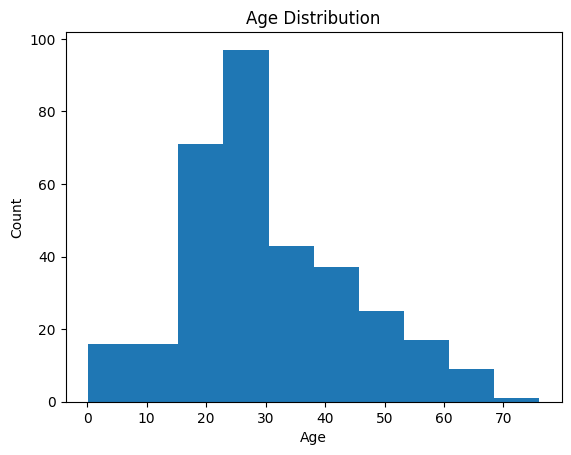

In [16]:
plt.figure()
plt.hist(df["Age"].dropna())
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


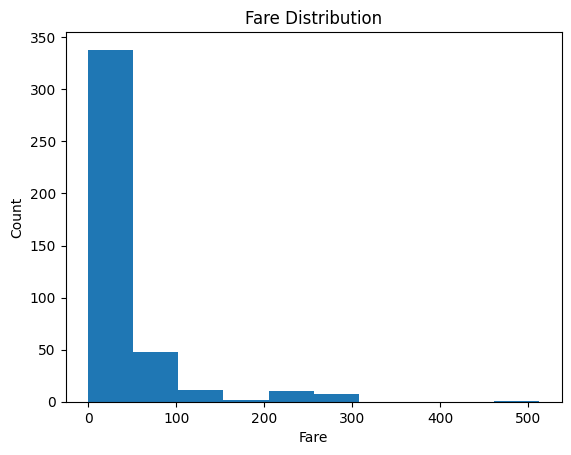

In [17]:
plt.figure()
plt.hist(df["Fare"].dropna())
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")
plt.show()


In [18]:
import joblib
joblib.dump(model, "naive_bayes_model.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(le_sex, "sex_encoder.pkl")
joblib.dump(le_emb, "embarked_encoder.pkl")

print("Model and preprocessors saved successfully!")

Model and preprocessors saved successfully!
